In [154]:
import numpy as np
import pandas as pd

In [156]:
import os
print(os.getcwd())

C:\Users\leona\Documents\doc IA\computational mathematics\udec\tareafinal


In [158]:
df0=pd.read_excel('df_prices.xlsx')
df0.head(3)

,observation_date,PALUMUSDM,PIORECRUSDM,PCOPPUSDM,POILBREUSDM
0,1990-01-01,1528.0,14.05,2365.556991,20.989130
1,1990-02-01,1454.0,14.05,2358.943400,19.702500
2,1990-03-01,1567.0,14.05,2625.702723,18.465909


In [160]:
df0['date'] = pd.date_range(start='1990-01-01', periods=len(df0), freq='MS')
df0.head(3)

,observation_date,PALUMUSDM,PIORECRUSDM,PCOPPUSDM,POILBREUSDM,date
0,1990-01-01,1528.0,14.05,2365.556991,20.989130,1990-01-01
1,1990-02-01,1454.0,14.05,2358.943400,19.702500,1990-02-01
2,1990-03-01,1567.0,14.05,2625.702723,18.465909,1990-03-01


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
fecha_corte=pd.to_datetime('2019-12-31')
pre_pandemia=df0['date'] < fecha_corte
post_pandemia=df0['date'] >= fecha_corte

In [166]:
series = ['PALUMUSDM', 'PIORECRUSDM', 'PCOPPUSDM', 'POILBREUSDM']

In [168]:
for col in series:
   df0[f'diff_pct_{col}'] = df0[col].pct_change() * 100  

In [172]:
from scipy.stats import kurtosis, skew, mode
summary_stats = pd.DataFrame(index=series, columns=[
    'Media', 'Varianza', 'Curtosis', 'Asimetría', 'Mínimo',
    'Máximo', 'Moda', 'Mediana', 'Rango'
])

def obtener_moda(x):
    resultado = mode(x, keepdims=True)
    if hasattr(resultado, 'mode') and len(resultado.mode) > 0:
        return resultado.mode[0]
    else:
        return np.nan

for col in series:
    x = df0[col].dropna()
    summary_stats.loc[col] = [
    x.mean(),
    x.var(),
    kurtosis(x, fisher=True),
    skew(x),
    x.min(),
    x.max(),
    obtener_moda(x),
    x.median(),
    x.max() - x.min()
]

summary_stats = summary_stats.astype(float).round(4)
print(summary_stats)

                 Media      Varianza  Curtosis  Asimetría     Mínimo  \
PALUMUSDM    1845.8365  2.231819e+05   -0.1306     0.6825  1040.0227   
PIORECRUSDM    60.0250  2.680384e+03   -0.5784     0.7627    11.4500   
PCOPPUSDM    4939.7689  7.595709e+06   -1.4326     0.2077  1377.3761   
POILBREUSDM    53.3030  1.058785e+03   -0.9442     0.4837    10.1600   

                 Máximo       Moda    Mediana      Rango  
PALUMUSDM     3498.3730  1040.0227  1765.4762  2458.3503  
PIORECRUSDM    215.8158    11.4500    36.6300   204.3658  
PCOPPUSDM    10230.8939  2447.1282  4953.7976  8853.5178  
POILBREUSDM    133.5852    10.1600    49.7362   123.4252  


In [174]:
pct_series = [f'diff_pct_{col}' for col in series]

summary_stats = pd.DataFrame(index=pct_series, columns=[
    'Media', 'Varianza', 'Curtosis', 'Asimetría', 'Mínimo',
    'Máximo', 'Moda', 'Mediana', 'Rango'
])

def obtener_moda(x):
    resultado = mode(x, keepdims=True)
    if hasattr(resultado, 'mode') and len(resultado.mode) > 0:
        return resultado.mode[0]
    else:
        return np.nan

for col in pct_series:
    x = df0[col].dropna()
    summary_stats.loc[col] = [
    x.mean(),
    x.var(),
    kurtosis(x, fisher=True),
    skew(x),
    x.min(),
    x.max(),
    obtener_moda(x),
    x.median(),
    x.max() - x.min()
]

summary_stats = summary_stats.astype(float).round(4)
print(summary_stats)

                       Media  Varianza  Curtosis  Asimetría   Mínimo   Máximo  \
diff_pct_PALUMUSDM    0.2300   23.6871    1.0339    -0.1207 -18.9924  15.9933   
diff_pct_PIORECRUSDM  0.7738   68.4650   21.6636     2.6380 -29.8426  71.5070   
diff_pct_PCOPPUSDM    0.5047   34.8548    3.6155    -0.0819 -29.8235  25.8375   
diff_pct_POILBREUSDM  0.6641   79.6730    3.8211     0.1542 -39.0435  54.2881   

                         Moda  Mediana     Rango  
diff_pct_PALUMUSDM   -18.9924   0.1053   34.9857  
diff_pct_PIORECRUSDM   0.0000   0.0000  101.3496  
diff_pct_PCOPPUSDM   -29.8235   0.4979   55.6610  
diff_pct_POILBREUSDM -39.0435   1.0642   93.3317  


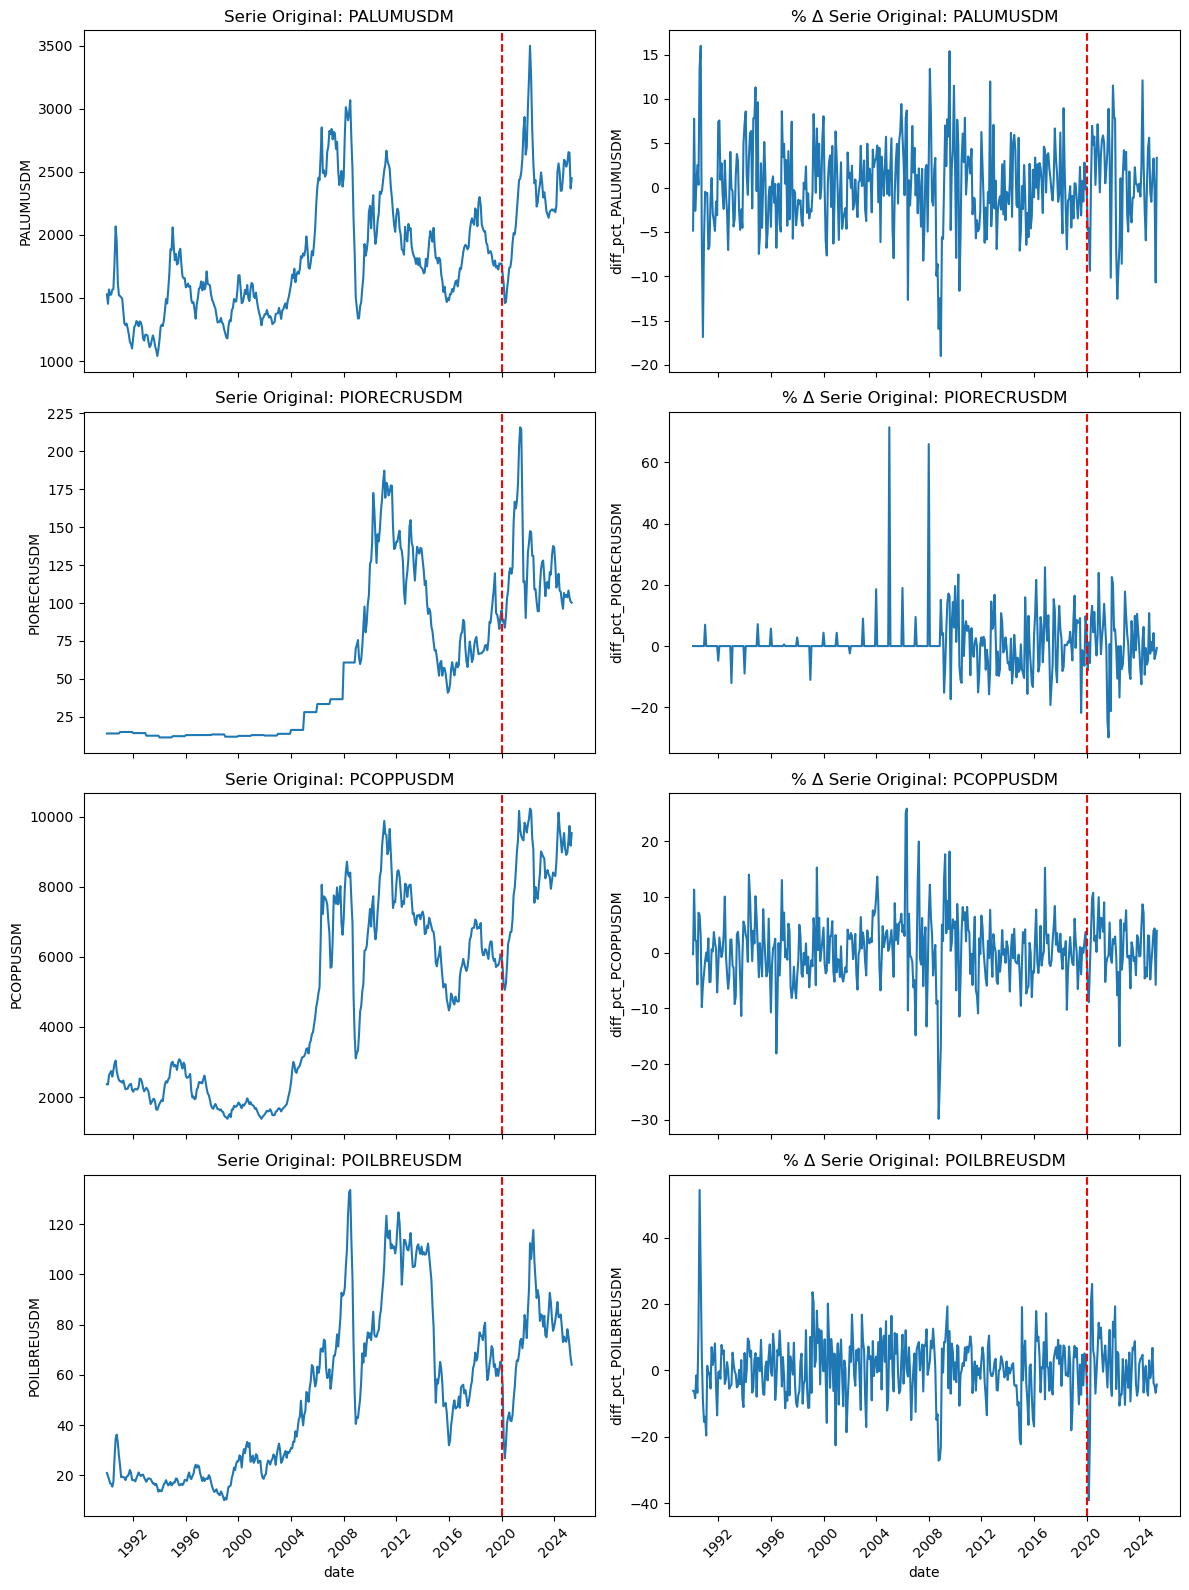

In [19]:
fig, axes = plt.subplots(len(series), 2, figsize=(12, 4 * len(series)), sharex=True)

for i, col in enumerate(series):
    # Serie original
    sns.lineplot(data=df0, x='date', y=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Serie Original: {col}')
    axes[i, 0].axvline(x=fecha_corte, color='red', linestyle='--')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Primera diferencia en porcentaje
    sns.lineplot(data=df0, x='date', y=f'diff_pct_{col}', ax=axes[i, 1])
    axes[i, 1].set_title(f'% Δ Serie Original: {col}')
    axes[i, 1].axvline(x=fecha_corte, color='red', linestyle='--')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('serie_y_dif_eps.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
#Medias e intervalos de confianza para las series en periodos pre y post pandemia.


from scipy.stats import sem, t

media_pre = {}
media_post = {}
ic_pre = {}
ic_post = {}

confianza = 0.95

for col in series:
    for tipo, nombre in zip([col, f'diff_pct_{col}'], ['original', 'diff']):
        datos_pre = df0.loc[pre_pandemia, tipo].dropna()
        datos_post = df0.loc[post_pandemia, tipo].dropna()
        
        # Pre-pandemia
        n_pre = len(datos_pre)
        m_pre = datos_pre.mean()
        se_pre = sem(datos_pre)
        t_crit_pre = t.ppf((1 + confianza) / 2, df=n_pre - 1)
        ic_pre[(col, nombre)] = (m_pre - t_crit_pre * se_pre, m_pre + t_crit_pre * se_pre)
        media_pre[(col, nombre)] = m_pre

        # Post-pandemia
        n_post = len(datos_post)
        m_post = datos_post.mean()
        se_post = sem(datos_post)
        t_crit_post = t.ppf((1 + confianza) / 2, df=n_post - 1)
        ic_post[(col, nombre)] = (m_post - t_crit_post * se_post, m_post + t_crit_post * se_post)
        media_post[(col, nombre)] = m_post

print(f"Medias e IC {int(confianza*100)}% para serie original y 1era diferencia:\n")
for col in series:
    for nombre, label in zip(['original', 'diff'], ['Serie Original', 'Primera Diferencia (%)']):
        key = (col, nombre)
        print(f"{col} — {label}:")
        print(f"  Pre-pandemia = {media_pre[key]:.4f} (IC: {ic_pre[key][0]:.4f}, {ic_pre[key][1]:.4f})")
        print(f"  Post-pandemia = {media_post[key]:.4f} (IC: {ic_post[key][0]:.4f}, {ic_post[key][1]:.4f})\n")

Medias e IC 95% para serie original y 1era diferencia:

PALUMUSDM — Serie Original:
  Pre-pandemia = 1758.4828 (IC: 1714.1136, 1802.8520)
  Post-pandemia = 2329.6416 (IC: 2227.4661, 2431.8171)

PALUMUSDM — Primera Diferencia (%):
  Pre-pandemia = 0.1562 (IC: -0.3411, 0.6535)
  Post-pandemia = 0.6378 (IC: -0.6724, 1.9480)

PIORECRUSDM — Serie Original:
  Pre-pandemia = 48.8168 (IC: 43.9595, 53.6741)
  Post-pandemia = 122.1013 (IC: 115.0142, 129.1884)

PIORECRUSDM — Primera Diferencia (%):
  Pre-pandemia = 0.7946 (IC: -0.0297, 1.6190)
  Post-pandemia = 0.6584 (IC: -1.8156, 3.1324)

PCOPPUSDM — Serie Original:
  Pre-pandemia = 4303.3595 (IC: 4049.3427, 4557.3764)
  Post-pandemia = 8464.4976 (IC: 8138.1488, 8790.8463)

PCOPPUSDM — Primera Diferencia (%):
  Pre-pandemia = 0.4476 (IC: -0.1809, 1.0761)
  Post-pandemia = 0.8201 (IC: -0.4220, 2.0622)

POILBREUSDM — Serie Original:
  Pre-pandemia = 49.4247 (IC: 46.0113, 52.8381)
  Post-pandemia = 74.7828 (IC: 69.9676, 79.5980)

POILBREUSDM — Pri

In [24]:
#Coeficientes de correlación e intervalos de confiaza

diff_cols = [f'diff_pct_{col}' for col in series]
df_diff = df0[diff_cols].dropna()
corr_matrix = df_diff.corr()

def bootstrap_corr_ci(df, col1, col2, n_iter=1000, alpha=0.05):
    corrs = []
    n = len(df)
    for _ in range(n_iter):
        sample = df.sample(n, replace=True)
        r = sample[col1].corr(sample[col2])
        corrs.append(r)
    lower = np.percentile(corrs, 100 * alpha/2)
    upper = np.percentile(corrs, 100 * (1 - alpha/2))
    return lower, upper

print("Correlaciones entre primeras diferencias (%) y sus IC95% para toda la muestra:\n")
for i in range(len(diff_cols)):
    for j in range(i+1, len(diff_cols)):
        col1 = diff_cols[i]
        col2 = diff_cols[j]
        r_obs = df_diff[col1].corr(df_diff[col2])
        ci_low, ci_up = bootstrap_corr_ci(df_diff, col1, col2)

        print(f"{col1} vs {col2}:")
        print(f"  ρ = {r_obs:.3f} (IC95%: {ci_low:.3f}, {ci_up:.3f})\n")


Correlaciones entre primeras diferencias (%) y sus IC95% para toda la muestra:

diff_pct_PALUMUSDM vs diff_pct_PIORECRUSDM:
  ρ = 0.158 (IC95%: 0.070, 0.261)

diff_pct_PALUMUSDM vs diff_pct_PCOPPUSDM:
  ρ = 0.640 (IC95%: 0.577, 0.697)

diff_pct_PALUMUSDM vs diff_pct_POILBREUSDM:
  ρ = 0.416 (IC95%: 0.321, 0.500)

diff_pct_PIORECRUSDM vs diff_pct_PCOPPUSDM:
  ρ = 0.206 (IC95%: 0.120, 0.299)

diff_pct_PIORECRUSDM vs diff_pct_POILBREUSDM:
  ρ = 0.133 (IC95%: 0.055, 0.222)

diff_pct_PCOPPUSDM vs diff_pct_POILBREUSDM:
  ρ = 0.392 (IC95%: 0.298, 0.480)



In [26]:
#pruebas de normalidad

from scipy.stats import shapiro, jarque_bera

columnas = ['diff_pct_']

for col_base in series:
    print(f'\nNormalidad para la serie: {col_base}')
    for tipo in columnas:
        variable = f'{tipo}{col_base}'

        grupos = {
            'Total': df0[variable].dropna(),
            'Pre-pandemia': df0.loc[pre_pandemia, variable].dropna(),
            'Post-pandemia': df0.loc[post_pandemia, variable].dropna()
        }

        for grupo, datos in grupos.items():
            if len(datos) < 3:
                print(f'  - {tipo} ({grupo}): Insuficiente cantidad de datos')
                continue

            _, p_shapiro = shapiro(datos)
            _, p_jb = jarque_bera(datos)

            print(f'  - {tipo} ({grupo}):')
            print(f'     Shapiro-Wilk p-valor = {p_shapiro:.4f}')
            print(f'     Jarque-Bera  p-valor = {p_jb:.4f}')


Normalidad para la serie: PALUMUSDM
  - diff_pct_ (Total):
     Shapiro-Wilk p-valor = 0.0056
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Pre-pandemia):
     Shapiro-Wilk p-valor = 0.0007
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Post-pandemia):
     Shapiro-Wilk p-valor = 0.1923
     Jarque-Bera  p-valor = 0.3831

Normalidad para la serie: PIORECRUSDM
  - diff_pct_ (Total):
     Shapiro-Wilk p-valor = 0.0000
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Pre-pandemia):
     Shapiro-Wilk p-valor = 0.0000
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Post-pandemia):
     Shapiro-Wilk p-valor = 0.1450
     Jarque-Bera  p-valor = 0.0977

Normalidad para la serie: PCOPPUSDM
  - diff_pct_ (Total):
     Shapiro-Wilk p-valor = 0.0000
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Pre-pandemia):
     Shapiro-Wilk p-valor = 0.0000
     Jarque-Bera  p-valor = 0.0000
  - diff_pct_ (Post-pandemia):
     Shapiro-Wilk p-valor = 0.1803
     Jarque-Bera  p-valor = 0.0545

Norm

In [72]:
#Generación de valores atípicos. Se genera un valor atípico
np.random.seed(42)

series = ['diff_pct_PALUMUSDM', 'diff_pct_PIORECRUSDM', 'diff_pct_PCOPPUSDM', 'diff_pct_POILBREUSDM']
df_contaminado = df0.copy()

n = len(df_contaminado)
n_outliers = int(0.15 * n)
idx_outliers = np.random.choice(df_contaminado.index, size=n_outliers, replace=False)

for s in series:
    std = df0[s].std()
    ruido_extremo = np.random.choice([-1, 1], size=n_outliers) * np.random.uniform(4, 6, size=n_outliers) * std

    nueva_col = f'{s}_contaminada'
    df_contaminado[nueva_col] = df0[s]
    df_contaminado.loc[idx_outliers, nueva_col] += ruido_extremo

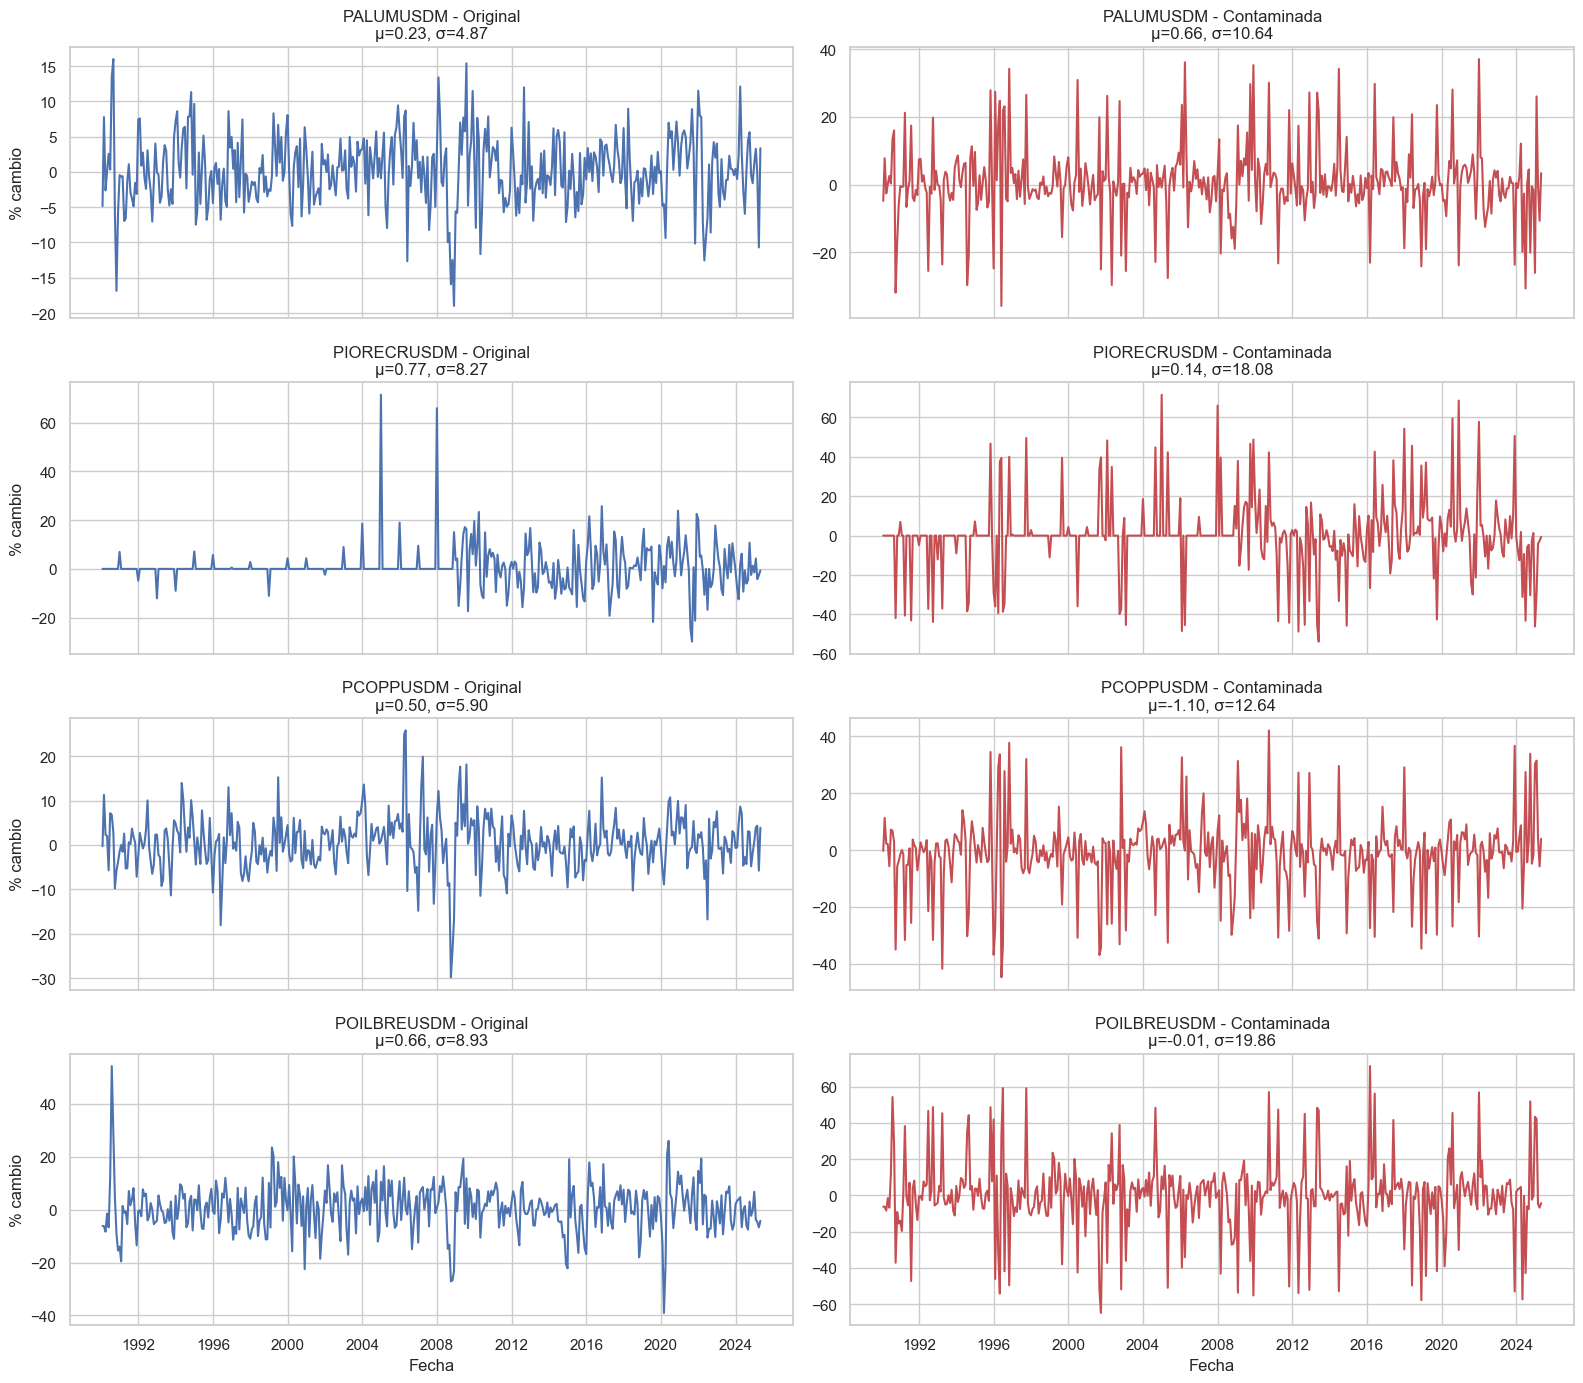

In [30]:
#representación gráfica de series contaminadas

sns.set(style='whitegrid')
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=True)
axs = axs.reshape(4, 2)

for i, s in enumerate(series):
    original = s
    contaminada = f'{s}_contaminada'

    mean_orig = df0[original].mean()
    std_orig = df0[original].std()
    mean_cont = df_contaminado[contaminada].mean()
    std_cont = df_contaminado[contaminada].std()

    axs[i, 0].plot(df0['date'], df0[original], color='#4c72b0')
    axs[i, 0].set_title(f"{s.replace('diff_pct_', '')} - Original\nμ={mean_orig:.2f}, σ={std_orig:.2f}")
    axs[i, 0].set_ylabel('% cambio')


    axs[i, 1].plot(df_contaminado['date'], df_contaminado[contaminada], color='#c44e52')
    axs[i, 1].set_title(f"{s.replace('diff_pct_', '')} - Contaminada\nμ={mean_cont:.2f}, σ={std_cont:.2f}")


for ax in axs[-1]:
    ax.set_xlabel('Fecha')

plt.tight_layout()
plt.savefig('outliers_artificial_delta_serie_columnas_con_estadisticas.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
#Generación de varibale indicadora. Valor 1 es un valor atípico, 0 en caso contrario
df0['dummy_outlier'] = 0
df0.loc[idx_outliers, 'dummy_outlier'] = 1
df0['dummy_outlier'].sum()

features = ['diff_pct_PALUMUSDM_contaminada', 'diff_pct_POILBREUSDM_contaminada', 'diff_pct_PIORECRUSDM_contaminada', 'diff_pct_PCOPPUSDM_contaminada']
df0[features] = df_contaminado[features]
df0 = df0.dropna()



In [76]:
df0

,observation_date,PALUMUSDM,PIORECRUSDM,PCOPPUSDM,POILBREUSDM,date,diff_pct_PALUMUSDM,diff_pct_PIORECRUSDM,diff_pct_PCOPPUSDM,diff_pct_POILBREUSDM,dummy_outlier,diff_pct_PALUMUSDM_contaminada,diff_pct_POILBREUSDM_contaminada,diff_pct_PIORECRUSDM_contaminada,diff_pct_PCOPPUSDM_contaminada
1,1990-02-01,1454.000000,14.050000,2358.943400,19.702500,1990-02-01,-4.842932,0.000000,-0.279579,-6.129984,0,-4.842932,-6.129984,0.000000,-0.279579
2,1990-03-01,1567.000000,14.050000,2625.702723,18.465909,1990-03-01,7.771664,0.000000,11.308424,-6.276315,0,7.771664,-6.276315,0.000000,11.308424
3,1990-04-01,1526.000000,14.050000,2685.226891,16.926190,1990-04-01,-2.616465,0.000000,2.266980,-8.338168,0,-2.616465,-8.338168,0.000000,2.266980
4,1990-05-01,1527.000000,14.050000,2740.342391,16.671739,1990-05-01,0.065531,0.000000,2.052545,-1.503300,0,0.065531,-1.503300,0.000000,2.052545
5,1990-06-01,1566.000000,14.050000,2583.814909,15.552381,1990-06-01,2.554028,0.000000,-5.711968,-6.714106,0,2.554028,-6.714106,0.000000,-5.711968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2025-01-01,2571.370435,103.782609,8976.680435,78.193913,2025-01-01,1.199905,-1.479293,0.749421,6.781838,1,-26.121479,43.407528,-46.109926,30.175309
421,2025-02-01,2655.772500,108.200000,9330.975000,75.193000,2025-02-01,3.282377,4.256389,3.946833,-3.837783,1,26.067470,42.148807,-29.798606,31.443777
422,2025-03-01,2651.598571,103.652381,9735.823333,71.741429,2025-03-01,-0.157164,-4.202975,4.338757,-4.590283,0,-0.157164,-4.590283,-4.202975,4.338757
423,2025-04-01,2367.800455,100.909091,9172.695909,66.927273,2025-04-01,-10.702907,-2.646625,-5.784076,-6.710427,0,-10.702907,-6.710427,-2.646625,-5.784076


In [78]:
#aplicación de métodos de detección de valores atípicos: métodos de proyección

from sklearn.decomposition import KernelPCA
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

features = ['diff_pct_PALUMUSDM_contaminada', 'diff_pct_POILBREUSDM_contaminada', 'diff_pct_PIORECRUSDM_contaminada', 'diff_pct_PCOPPUSDM_contaminada']

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
resultados = {}

y_true = df0.loc[df0[features].dropna().index, 'dummy_outlier'].values

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1)
    X_kpca = kpca.fit_transform(df0[features].dropna())

    centro = np.mean(X_kpca, axis=0)
    distancias = np.linalg.norm(X_kpca - centro, axis=1)
    threshold = np.percentile(distancias, 97.5)
    y_pred = (distancias > threshold).astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    masking = np.sum((y_true == 1) & (y_pred == 0)) / np.sum(y_true == 1)
    swamping = np.sum((y_true == 0) & (y_pred == 1)) / np.sum(y_true == 0)

    resultados[kernel] = {
        'Precisión': precision,
        'Sensibilidad': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'Masking': masking,
        'Swamping': swamping
    }

df_resultados = pd.DataFrame(resultados).T
df_resultados = df_resultados[['Precisión', 'Sensibilidad', 'F1 Score', 'MCC', 'Masking', 'Swamping']]
print(df_resultados)

         Precisión  Sensibilidad  F1 Score       MCC   Masking  Swamping
linear    0.909091      0.161290  0.273973  0.352358  0.838710  0.002762
poly      1.000000      0.177419  0.301370  0.394348  0.822581  0.000000
rbf       0.000000      0.000000  0.000000 -0.067540  1.000000  0.030387
sigmoid   0.636364      0.112903  0.191781  0.226389  0.887097  0.011050
cosine    0.000000      0.000000  0.000000 -0.067540  1.000000  0.030387


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


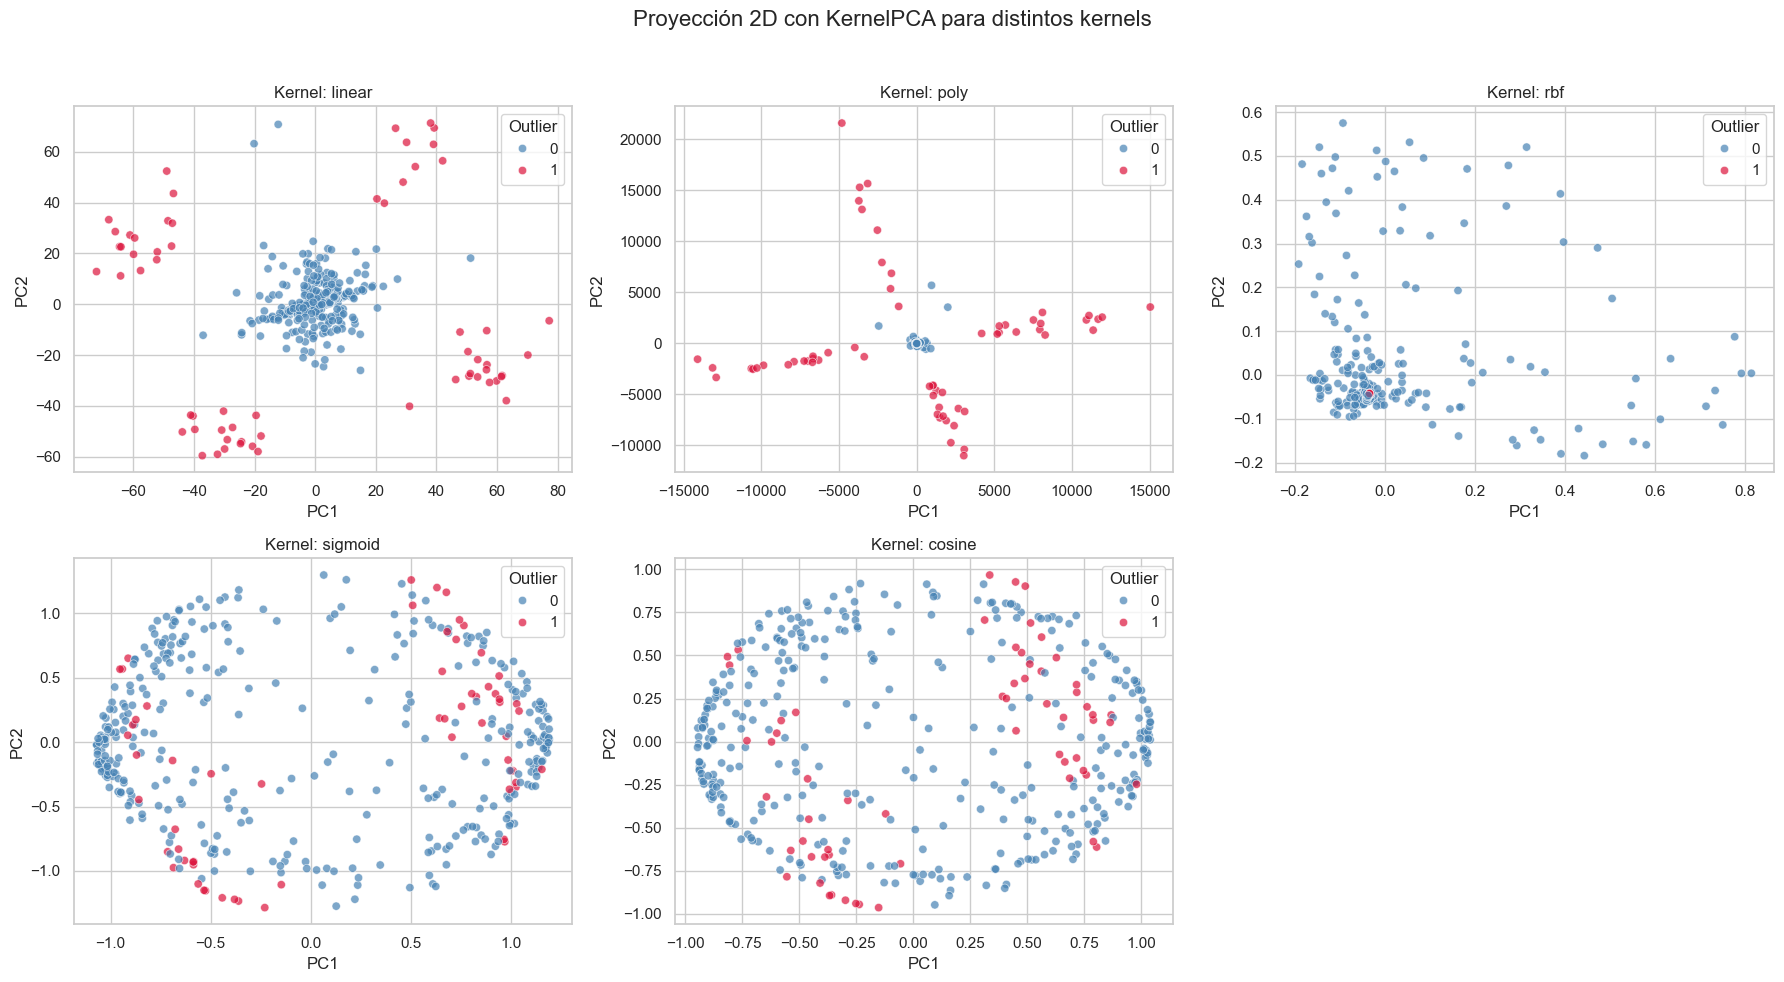

In [124]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1)
    X_kpca = kpca.fit_transform(df0[features].dropna())
    y_plot = df0.loc[df0[features].dropna().index, 'dummy_outlier'].values

    sns.scatterplot(
        x=X_kpca[:, 0], y=X_kpca[:, 1],
        hue=y_plot, palette={0: 'steelblue', 1: 'crimson'},
        alpha=0.7, ax=axes[i]
    )
    axes[i].set_title(f'Kernel: {kernel}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].legend(title='Outlier', loc='best')

if len(kernels) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Proyección 2D con KernelPCA para distintos kernels', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('proyeccion_pca.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [80]:
#aplicación de métodos de detección de valores atípicos: métodos de distancia

from sklearn.covariance import EmpiricalCovariance, MinCovDet, ShrunkCovariance
from scipy.stats import chi2

estimadores = {
    'EmpiricalCov': EmpiricalCovariance(),
    'MinCovDet': MinCovDet(),
    'ShrunkCov': ShrunkCovariance()
}


X = df0[features].dropna().values
y_true = df0.loc[df0[features].dropna().index, 'dummy_outlier'].values
resultados = {}

threshold = chi2.ppf(0.975, df=X.shape[1])

for nombre, modelo in estimadores.items():
    modelo.fit(X)
    mahal = modelo.mahalanobis(X)
    y_pred = (mahal > threshold).astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    masking = np.sum((y_true == 1) & (y_pred == 0)) / np.sum(y_true == 1)
    swamping = np.sum((y_true == 0) & (y_pred == 1)) / np.sum(y_true == 0)

    resultados[nombre] = {
        'Precisión': precision,
        'Sensibilidad': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'Masking': masking,
        'Swamping': swamping
    }

df_mahal = pd.DataFrame(resultados).T
df_mahal = df_mahal[['Precisión', 'Sensibilidad', 'F1 Score', 'MCC', 'Masking', 'Swamping']]
print(df_mahal)

              Precisión  Sensibilidad  F1 Score       MCC  Masking  Swamping
EmpiricalCov   0.968750           1.0  0.984127  0.981528      0.0  0.005525
MinCovDet      0.326316           1.0  0.492063  0.459275      0.0  0.353591
ShrunkCov      0.968750           1.0  0.984127  0.981528      0.0  0.005525


In [82]:
#taba de resultados finales

df_resultados['Método'] = df_resultados.index
df_resultados['Tipo'] = 'Proyección'

df_mahal['Método'] = df_mahal.index
df_mahal['Tipo'] = 'Distancia'


df_comparativa = pd.concat([df_resultados, df_mahal], ignore_index=True)
df_comparativa = df_comparativa[['Método', 'Tipo', 'Precisión', 'Sensibilidad', 'F1 Score', 'MCC', 'Masking', 'Swamping']]

print(df_comparativa)

         Método        Tipo  Precisión  Sensibilidad  F1 Score       MCC  \
0        linear  Proyección   0.909091      0.161290  0.273973  0.352358   
1          poly  Proyección   1.000000      0.177419  0.301370  0.394348   
2           rbf  Proyección   0.000000      0.000000  0.000000 -0.067540   
3       sigmoid  Proyección   0.636364      0.112903  0.191781  0.226389   
4        cosine  Proyección   0.000000      0.000000  0.000000 -0.067540   
5  EmpiricalCov   Distancia   0.968750      1.000000  0.984127  0.981528   
6     MinCovDet   Distancia   0.326316      1.000000  0.492063  0.459275   
7     ShrunkCov   Distancia   0.968750      1.000000  0.984127  0.981528   

    Masking  Swamping  
0  0.838710  0.002762  
1  0.822581  0.000000  
2  1.000000  0.030387  
3  0.887097  0.011050  
4  1.000000  0.030387  
5  0.000000  0.005525  
6  0.000000  0.353591  
7  0.000000  0.005525  


In [104]:
#Estimación de modelo regresión lineal y robusto
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y=df0['diff_pct_PCOPPUSDM_contaminada']
X=df0[['diff_pct_PALUMUSDM_contaminada','diff_pct_POILBREUSDM_contaminada','diff_pct_PIORECRUSDM_contaminada']]
X = sm.add_constant(X) 


modelo_ols = sm.OLS(y, X).fit()
modelo_rlm = sm.RLM(y, X).fit()

y_pred_ols = modelo_ols.predict(X)
y_pred_rlm = modelo_rlm.predict(X)

def calcular_metricas(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

metricas_ols = calcular_metricas(y, y_pred_ols)
metricas_rlm = calcular_metricas(y, y_pred_rlm)

df_comparacion = pd.DataFrame([metricas_ols, metricas_rlm], index=['OLS', 'RLM'])
print(df_comparacion)

          RMSE       MAE        R²
OLS  12.242365  7.394418  0.059763
RLM  13.421962  6.739939 -0.130156


In [144]:
# Valores reales y predichos
y_true = y
y_pred = modelo_rlm.predict(X)
y_mean = np.mean(y_true)

# Sumas de cuadrados
SST = np.sum((y_true - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y_true - y_pred)**2)

# Grados de libertad
n = len(y_true)
k = X.shape[1] - 1  # excluyendo constante
df_model = k
df_resid = n - k - 1

# Cuadrados medios
MSR = SSR / df_model
MSE = SSE / df_resid

# Estadístico F
F_stat = MSR / MSE

# p-valor
from scipy.stats import f
p_value = 1 - f.cdf(F_stat, df_model, df_resid)

# Mostrar resultados
print(f"SST: {SST:.3f}")
print(f"SSR: {SSR:.3f}")
print(f"SSE: {SSE:.3f}")
print(f"F: {F_stat:.3f}")
print(f"p-valor: {p_value:.3e}")


SST: 67586.413
SSR: 30230.968
SSE: 76383.205
F: 55.409
p-valor: 1.110e-16


In [108]:
#análisis de residuos

from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson

# Residuos
resid_ols = modelo_ols.resid
resid_rlm = modelo_rlm.resid

# --- OLS ---
print("=== OLS ===")
# Jarque-Bera
jb_stat, jb_p, _, _ = jarque_bera(resid_ols)
print(f"Jarque-Bera: estadístico = {jb_stat:.3f}, p-valor = {jb_p:.3f}")

# Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(resid_ols)
print(f"Shapiro-Wilk: estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")

# Durbin-Watson
dw_stat = durbin_watson(resid_ols)
print(f"Durbin-Watson: estadístico = {dw_stat:.3f}")

#Breusch-Pagan (heterocedasticidad)
bp_test = het_breuschpagan(resid_ols, modelo_ols.model.exog)
print(f"Breusch-Pagan: estadístico = {bp_test[0]:.3f}, p-valor = {bp_test[1]:.3f}")

#Breusch-Godfrey (autocorrelación)
bg_test = acorr_breusch_godfrey(modelo_ols, nlags=2)
print(f"Breusch-Godfrey: estadístico = {bg_test[0]:.3f}, p-valor = {bg_test[1]:.3f}")

# --- RLM ---
print("\n=== RLM ===")
#Jarque-Bera
jb_stat, jb_p, _, _ = jarque_bera(resid_rlm)
print(f"Jarque-Bera: estadístico = {jb_stat:.3f}, p-valor = {jb_p:.3f}")

#Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(resid_rlm)
print(f"Shapiro-Wilk: estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")

#Durbin-Watson
dw_stat = durbin_watson(resid_rlm)
print(f"Durbin-Watson: estadístico = {dw_stat:.3f}")

#Breusch-Pagan
bp_test = het_breuschpagan(resid_rlm, modelo_rlm.model.exog)
print(f"Breusch-Pagan: estadístico = {bp_test[0]:.3f}, p-valor = {bp_test[1]:.3f}")

#Breusch-Godfrey
bg_test = acorr_breusch_godfrey(modelo_rlm, nlags=2)
print(f"Breusch-Godfrey: estadístico = {bg_test[0]:.3f}, p-valor = {bg_test[1]:.3f}")

=== OLS ===
Jarque-Bera: estadístico = 233.360, p-valor = 0.000
Shapiro-Wilk: estadístico = 0.839, p-valor = 0.000
Durbin-Watson: estadístico = 1.841
Breusch-Pagan: estadístico = 21.301, p-valor = 0.000
Breusch-Godfrey: estadístico = 4.945, p-valor = 0.084

=== RLM ===
Jarque-Bera: estadístico = 1364.267, p-valor = 0.000
Shapiro-Wilk: estadístico = 0.694, p-valor = 0.000
Durbin-Watson: estadístico = 1.923
Breusch-Pagan: estadístico = 39.471, p-valor = 0.000
Breusch-Godfrey: estadístico = 68.455, p-valor = 0.000


In [110]:
#Matriz de correlaciones 

diff_cols = features
df_diff = df0[diff_cols].dropna()
corr_matrix = df_diff.corr()

print("Correlaciones entre primeras diferencias (%) y sus IC95% para toda la muestra:\n")
for i in range(len(diff_cols)):
    for j in range(i+1, len(diff_cols)):
        col1 = diff_cols[i]
        col2 = diff_cols[j]
        r_obs = df_diff[col1].corr(df_diff[col2])
        ci_low, ci_up = bootstrap_corr_ci(df_diff, col1, col2)

        print(f"{col1} vs {col2}:")
        print(f"  ρ = {r_obs:.3f} (IC95%: {ci_low:.3f}, {ci_up:.3f})\n")

Correlaciones entre primeras diferencias (%) y sus IC95% para toda la muestra:

diff_pct_PALUMUSDM_contaminada vs diff_pct_POILBREUSDM_contaminada:
  ρ = 0.031 (IC95%: -0.165, 0.258)

diff_pct_PALUMUSDM_contaminada vs diff_pct_PIORECRUSDM_contaminada:
  ρ = 0.029 (IC95%: -0.182, 0.235)

diff_pct_PALUMUSDM_contaminada vs diff_pct_PCOPPUSDM_contaminada:
  ρ = 0.232 (IC95%: 0.037, 0.434)

diff_pct_POILBREUSDM_contaminada vs diff_pct_PIORECRUSDM_contaminada:
  ρ = -0.067 (IC95%: -0.266, 0.132)

diff_pct_POILBREUSDM_contaminada vs diff_pct_PCOPPUSDM_contaminada:
  ρ = -0.034 (IC95%: -0.234, 0.191)

diff_pct_PIORECRUSDM_contaminada vs diff_pct_PCOPPUSDM_contaminada:
  ρ = 0.073 (IC95%: -0.114, 0.265)



In [112]:
from scipy.stats import pearsonr

# Variables contaminadas
features = [
    'diff_pct_PALUMUSDM_contaminada',
    'diff_pct_POILBREUSDM_contaminada',
    'diff_pct_PIORECRUSDM_contaminada',
    'diff_pct_PCOPPUSDM_contaminada'
]

df0 = df0.dropna()
data = df0[features]

# Función para calcular correlación y su intervalo de confianza
def correlacion_con_ic(x, y, n_boot=1000, alpha=0.05):
    r_obs, _ = pearsonr(x, y)
    boots = [pearsonr(np.random.choice(x, len(x), replace=True),
                      np.random.choice(y, len(y), replace=True))[0]
             for _ in range(n_boot)]
    ci_lower = np.percentile(boots, 100 * alpha / 2)
    ci_upper = np.percentile(boots, 100 * (1 - alpha / 2))
    return r_obs, ci_lower, ci_upper

# Matrices
corr_matrix = pd.DataFrame(index=features, columns=features)
ci_matrix = pd.DataFrame(index=features, columns=features)

for i in features:
    for j in features:
        r, ci_l, ci_u = correlacion_con_ic(data[i], data[j])
        corr_matrix.loc[i, j] = round(r, 3)
        ci_matrix.loc[i, j] = f"[{ci_l:.2f}, {ci_u:.2f}]"

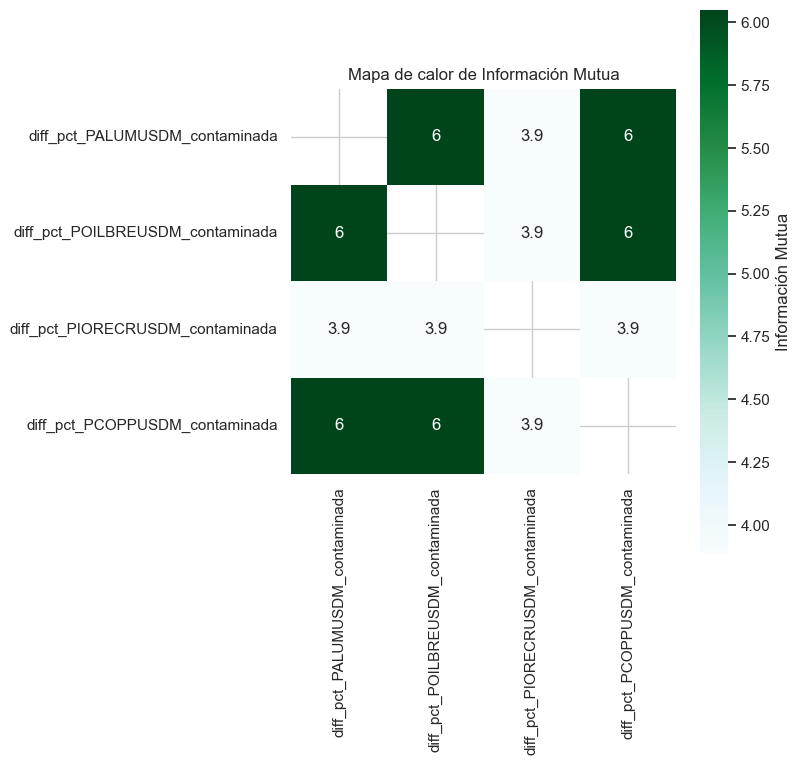

In [130]:
from sklearn.metrics import mutual_info_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Discretización ordinal
data_discrete = data.rank(method='average').astype(int)

# Inicializamos la matriz
mi_matrix = pd.DataFrame(index=features, columns=features)

for i in features:
    for j in features:
        if i != j:
            mi = mutual_info_score(data_discrete[i], data_discrete[j])
            mi_matrix.loc[i, j] = mi
        else:
            mi_matrix.loc[i, j] = np.nan

# Convertir a tipo float
mi_matrix = mi_matrix.astype(float)

plt.figure(figsize=(8, 8))
sns.heatmap(mi_matrix, annot=True, cmap="BuGn", square=True,
            cbar_kws={"label": "Información Mutua"})
plt.title("Mapa de calor de Información Mutua")
plt.tight_layout()
plt.savefig('heatmap_imutua.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('heatmap_imutua.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



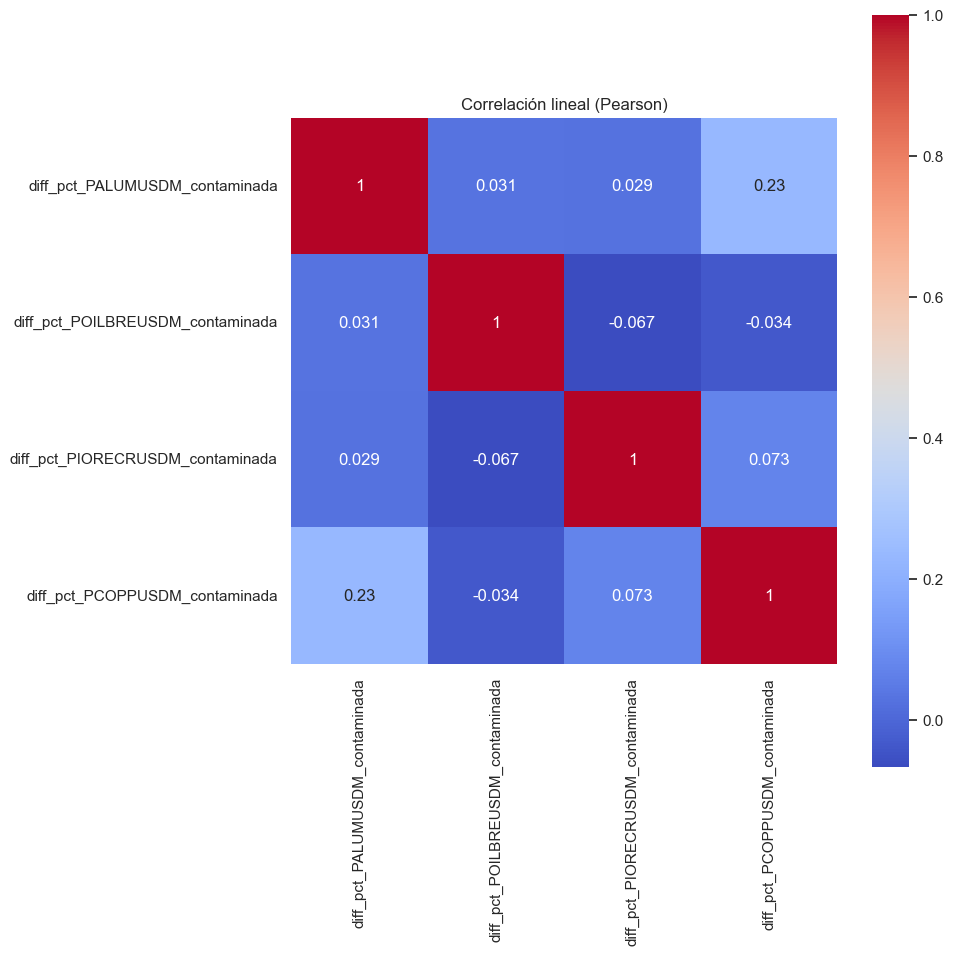

In [132]:
#mapa de calor de correlación lineal

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlación lineal (Pearson)")
plt.tight_layout()
plt.savefig('heatmap_pearson.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('heatmap_pearson.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\leona\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions shou

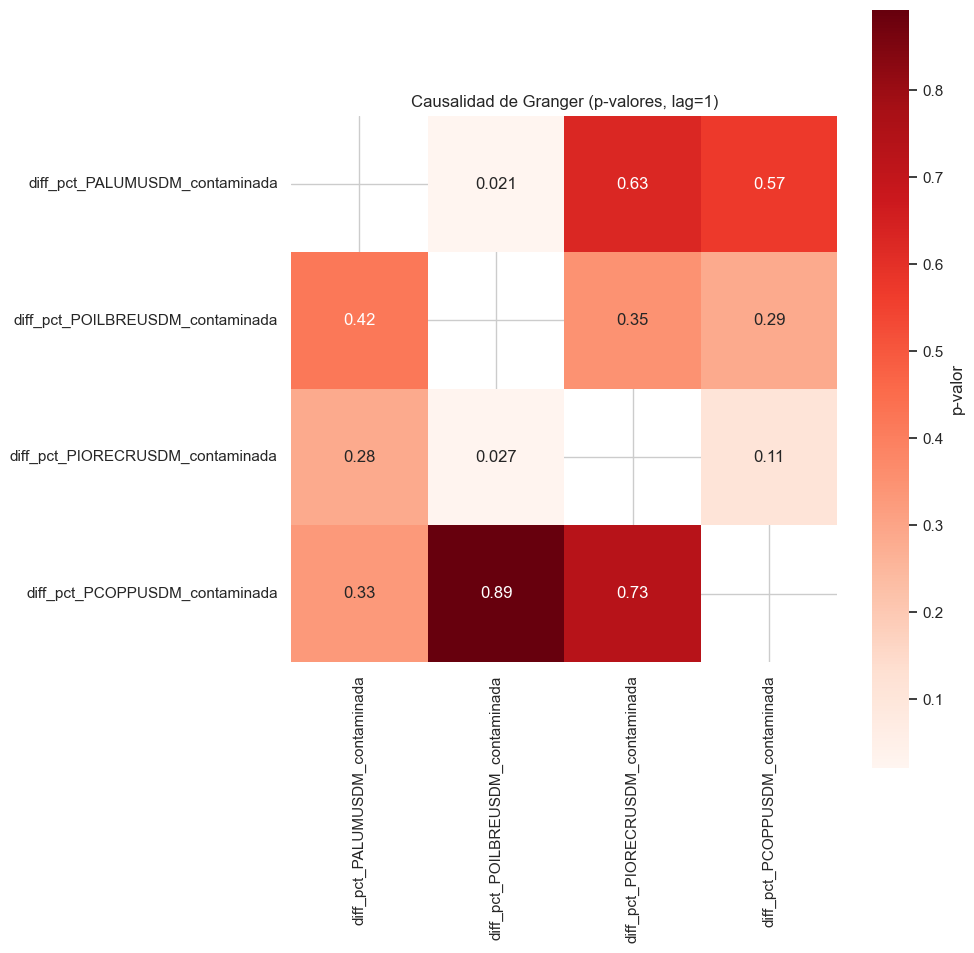

In [134]:
#mapa de correlación de granger con 1 rezago

from statsmodels.tsa.stattools import grangercausalitytests

granger_matrix = pd.DataFrame(index=features, columns=features)

for col_y in features:
    for col_x in features:
        if col_y != col_x:
            test_result = grangercausalitytests(data[[col_y, col_x]].dropna(), maxlag=1, verbose=False)
            p_value = test_result[1][0]['ssr_ftest'][1]
            granger_matrix.loc[col_y, col_x] = p_value
        else:
            granger_matrix.loc[col_y, col_x] = np.nan

granger_matrix = granger_matrix.astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(granger_matrix, annot=True, cmap="Reds", square=True, cbar_kws={"label": "p-valor"})
plt.title("Causalidad de Granger (p-valores, lag=1)")
plt.tight_layout()
plt.savefig('heatmap_granger.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('heatmap_granger.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

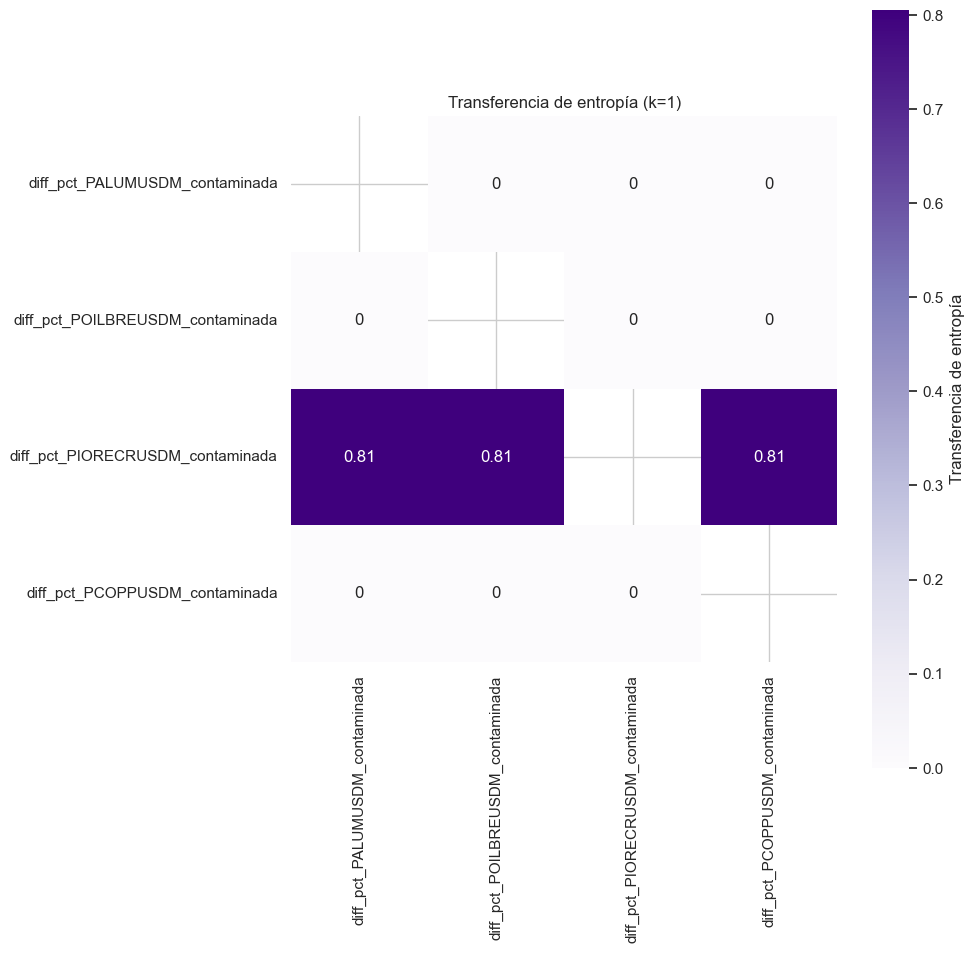

In [136]:
#mapa de calor de transferencia de entreopia

from pyinform.transferentropy import transfer_entropy

te_matrix = pd.DataFrame(index=features, columns=features)

# Normalizar y discretizar para TE
data_discrete = data.rank(method='average').astype(int)

for source in features:
    for target in features:
        if source != target:
            te = transfer_entropy(data_discrete[source].values, data_discrete[target].values, k=1)
            te_matrix.loc[target, source] = te
        else:
            te_matrix.loc[target, source] = np.nan

te_matrix = te_matrix.astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(te_matrix, annot=True, cmap="Purples", square=True, cbar_kws={"label": "Transferencia de entropía"})
plt.title("Transferencia de entropía (k=1)")
plt.tight_layout()
plt.savefig('heatmap_transfer.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('heatmap_transfer.png', format='png', dpi=300, bbox_inches='tight')
plt.show()